### Dataset & EDA

In [ ]:
from google.colab import files
files.upload()

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

100% 41.0M/41.0M [00:02<00:00, 13.1MB/s]



In [5]:
!ls /content

 fake-and-real-news-dataset.zip  'kaggle (1).json'   kaggle.json   sample_data


In [6]:
!unzip fake-and-real-news-dataset.zip

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [7]:
import pandas as pd

In [8]:
true = pd.read_csv('/content/True.csv')

In [9]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [10]:
fake = pd.read_csv('/content/Fake.csv')

In [11]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [12]:
true.shape

(21417, 4)

In [13]:
fake.shape

(23481, 4)

In [14]:
true['label'] = 1

In [15]:
true.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [16]:
fake['label'] = 0

In [17]:
fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [18]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)

In [19]:
df.shape

(10002, 5)

In [20]:
df = df.sample(frac=1).reset_index(drop=True)

In [21]:
df.head()

,title,text,subject,date,label
0,"Zach Johnson, Pieters share lead at Firestone",(Reuters) - Late birdies from Thomas Pieters a...,politicsNews,"August 5, 2017",1
1,House Speaker Ryan sees long battle over tax r...,LONDON (Reuters) - The United States’ first ta...,politicsNews,"April 19, 2017",1
2,Exclusive: U.S. asks nations to provide more t...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"July 13, 2017",1
3,The Cast Of Hamilton Had An EXTRAORDINARY Mes...,"Donald Trump is now the president-elect, and h...",News,"November 19, 2016",0
4,Trump Just Got His P*ssy Handed To Him By New...,Donald Trump bit off a bit more than he could ...,News,"November 17, 2017",0


In [22]:
X = df.drop('label', axis=1)

In [23]:
y = df['label']

In [24]:
df = df.dropna()

In [25]:
messages = df.copy()

In [26]:
messages.reset_index(inplace=True)

In [27]:
messages.head()

,index,title,text,subject,date,label
0,0,"Zach Johnson, Pieters share lead at Firestone",(Reuters) - Late birdies from Thomas Pieters a...,politicsNews,"August 5, 2017",1
1,1,House Speaker Ryan sees long battle over tax r...,LONDON (Reuters) - The United States’ first ta...,politicsNews,"April 19, 2017",1
2,2,Exclusive: U.S. asks nations to provide more t...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"July 13, 2017",1
3,3,The Cast Of Hamilton Had An EXTRAORDINARY Mes...,"Donald Trump is now the president-elect, and h...",News,"November 19, 2016",0
4,4,Trump Just Got His P*ssy Handed To Him By New...,Donald Trump bit off a bit more than he could ...,News,"November 17, 2017",0


In [28]:
messages['title'][2]

'Exclusive: U.S. asks nations to provide more traveler data or face sanctions'

In [29]:
messages['text'][2]

'WASHINGTON (Reuters) - The U.S. State Department will require all nations to provide extensive data to help it vet visa applicants and determine whether a traveler poses a terrorist threat, according to a cable obtained by Reuters.  Countries that fail to comply with the new protocols or take steps to do so within 50 days could face travel sanctions.  The cable, sent to all U.S. diplomatic posts on Wednesday,  is a summary of a worldwide review of vetting procedures that was required under U.S. President Donald Trump’s revised March 6 executive order that temporarily banned U.S. travel by most citizens from six predominantly Muslim countries. The memo lays out a series of standards the United States will require of other countries, including that they issue, or have active plans to issue, electronic passports and regularly report lost and stolen passports to INTERPOL.  It also directs nations to provide “any other identity information” requested by Washington for U.S. visa applicants,

### Preprocessing

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
len(corpus)

10002

In [33]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [34]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [35]:
X = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [36]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head(3)

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,abus,aca,accept,access,accompani,accomplish,accord,accord new,account,account presid,account presid donald,accur,accuraci,accuraci realdonaldtrump,accus,accus presid,accus trump,achiev,acknowledg,aclu,acosta,across,across countri,act,act like,action,action childhood,action childhood arriv,activ,activist,...,writer,written,wrong,wrongdo,wrote,wrote letter,wrote twitter,wyden,xi,xi jinp,yate,ye,yeah,year,year ago,year elect,year end,year old,year presidenti,year republican,year trump,yell,yellen,yemen,yesterday,yet,yet anoth,yield,york,york citi,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.03832,0.0,0.0,0.0,0.0,0.0,0.0,0.043624,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030131,0.0,0.033505,0.0,0.0,0.042655,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.08072,0.0,0.0,0.025289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Passive Aggressive Classifier - Baseline

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [39]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.998


In [40]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


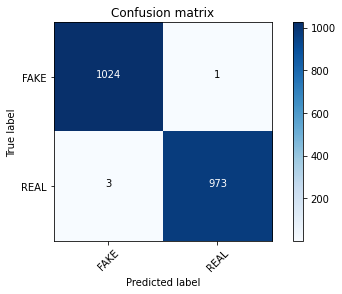

In [41]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [42]:
classifier.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

### Preprocess and transform datapoint text (true['text'][16888]) and try to predict it based on the model

In [43]:
review = re.sub('[^a-zA-Z]', ' ', true['text'][16888])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'cairo reuter three polic offic kill eight other injur shoot raid suspect milit hideout giza southwest egyptian capit two secur sourc said friday sourc said author follow lead apart thought hous eight suspect member hasm group claim sever attack around capit target judg policemen sinc last year suspect milit fled exchang fire sourc said egypt accus hasm milit wing muslim brotherhood islamist group outlaw muslim brotherhood deni islamist insurg sinai peninsula grown sinc militari overthrew presid moham mursi muslim brotherhood mid follow mass protest rule milit group stage insurg pledg allegi islam state blame kill hundr soldier policemen start target area includ egypt christian copt'

In [44]:
val = tfidf_v.transform([review]).toarray()

In [45]:
pd.DataFrame(val, columns=tfidf_v.get_feature_names())

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,abus,aca,accept,access,accompani,accomplish,accord,accord new,account,account presid,account presid donald,accur,accuraci,accuraci realdonaldtrump,accus,accus presid,accus trump,achiev,acknowledg,aclu,acosta,across,across countri,act,act like,action,action childhood,action childhood arriv,activ,activist,...,writer,written,wrong,wrongdo,wrote,wrote letter,wrote twitter,wyden,xi,xi jinp,yate,ye,yeah,year,year ago,year elect,year end,year old,year presidenti,year republican,year trump,yell,yellen,yemen,yesterday,yet,yet anoth,yield,york,york citi,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
classifier.predict(val)

array([1])

### Saving model and TFIDF Vectorizer

In [47]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [48]:
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [49]:
joblib.dump(tfidf_v, 'tfidfvect.pkl')

['tfidfvect.pkl']

### Load model and vectorizer and predict on previous preprocessed datapoint

In [50]:
joblib_model = joblib.load('model.pkl')

In [51]:
joblib_tfidfvect = joblib.load('tfidfvect.pkl')

In [52]:
val_pkl = joblib_tfidfvect.transform([review]).toarray()

In [53]:
joblib_model.predict(val_pkl)

array([1])

### Save some datapoints for text random generation

In [54]:
frames_2 = [true.loc[0:10][:], fake.loc[0:10][:]]
df_2 = pd.concat(frames_2)

In [55]:
df_2.to_csv('random_dataset.csv', index=False)